# Population, Agricultural Production, and the Green Revolution

In [1]:
# Load packages and World Bank Data

import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
pd.options.plotting.backend = "plotly"
%pip install wbdata
import wbdata
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='wbdata')

  Using cached wbdata-1.0.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached backoff-2.2.1-py3-none-any.whl.metadata (14 kB)
  Using cached dateparser-1.2.0-py2.py3-none-any.whl.metadata (28 kB)
  Using cached shelved_cache-0.3.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached tabulate-0.8.10-py3-none-any.whl.metadata (25 kB)
  Using cached tzlocal-5.2-py3-none-any.whl.metadata (7.8 kB)
Using cached wbdata-1.0.0-py3-none-any.whl (18 kB)
Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
Using cached backoff-2.2.1-py3-none-any.whl (15 kB)
Using cached dateparser-1.2.0-py2.py3-none-any.whl (294 kB)
Using cached shelved_cache-0.3.1-py3-none-any.whl (7.8 kB)
Using cached tabulate-0.8.10-py3-none-any.whl (29 kB)
Using cached tzlocal-5.2-py3-none-any.whl (17 kB)
Note: you may need to restart the kernel to use updated packages.


Key '8425591040186827258' not in persistent cache.
Key '9133657167217425560' not in persistent cache.
Key '-6502083518974840089' not in persistent cache.
Key '7577909574699967850' not in persistent cache.
Key '-3205645014026657332' not in persistent cache.
Key '-7349764984461699497' not in persistent cache.
Key '2935591912607956947' not in persistent cache.
Key '1281152458594020137' not in persistent cache.
Key '8944341943576946571' not in persistent cache.
Key '6617992909022638486' not in persistent cache.
Key '8308844255138528820' not in persistent cache.
Key '-8544072014954465113' not in persistent cache.
Key '-5279239912955906807' not in persistent cache.
Key '2619844395444284677' not in persistent cache.
Key '-6231266319094147884' not in persistent cache.
Key '1025328495545504742' not in persistent cache.
Key '-2022473266647726226' not in persistent cache.
Key '3797440788890707441' not in persistent cache.
Key '6608444176407993408' not in persistent cache.
Key '7316510303438591710

In [3]:
# Set World Bank Data Sources/Indicators for Agriculutre
 
ag_indicators = wbdata.get_indicators(topic=1)
ag_indicators

id                    name
--------------------  ------------------------------------------------------------------------------------------
AG.AGR.TRAC.NO        Agricultural machinery, tractors
AG.CON.FERT.PT.ZS     Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS        Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2        Agricultural land (sq. km)
AG.LND.AGRI.ZS        Agricultural land (% of land area)
AG.LND.ARBL.HA        Arable land (hectares)
AG.LND.ARBL.HA.PC     Arable land (hectares per person)
AG.LND.ARBL.ZS        Arable land (% of land area)
AG.LND.CREL.HA        Land under cereal production (hectares)
AG.LND.CROP.ZS        Permanent cropland (% of land area)
AG.LND.EL5M.RU.K2     Rural land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.RU.ZS     Rural land area where elevation is below 5 meters (% of total land area)
AG.LND.FRST.K2        Forest area (sq. km)
AG.LND.FRST.ZS        Forest area (% of land area)

## Agricultural Analysis

### South Asia (Bangladesh, Bhutan, India, Maldives, Nepal, Pakistan, Sri Lanka)

In [38]:
variable_labels = {"AG.PRD.CREL.MT":"Cereal Production (MT)",
                   "AG.PRD.CROP.XD":"Crop Production Index",
                  "AG.PRD.FOOD.XD":"Food Production Index",
                   'SP.RUR.TOTL': 'Total Rural Population'
                  # "EA.PRD.AGRI.KD":"Agricultural Value Added per Worker"
                  }
SA_ag = wbdata.get_dataframe(variable_labels, country = countries,parse_dates=True)
SA_ag = SA_ag.reset_index()
SA_ag = SA_ag.rename(columns={'date': 'Date', 'country':'Country'})
SA_ag = SA_ag.set_index(['Date']).sort_index()
SA_ag = SA_ag.dropna(subset=["Cereal Production (MT)", "Crop Production Index", "Food Production Index"])
SA_ag

,Country,Cereal Production (MT),Crop Production Index,Food Production Index,Total Rural Population
Date,,,,,
1961-01-01,South Asia (IDA & IBRD),1.165423e+08,100.00,100.00,479825865.0
1961-01-01,Sri Lanka,9.518680e+05,22.90,22.43,8256868.0
1961-01-01,Bangladesh,1.452370e+07,27.03,24.29,50496628.0
1961-01-01,India,8.737650e+07,24.73,22.43,366040177.0
1961-01-01,Pakistan,6.729680e+06,17.81,13.71,36363520.0
...,...,...,...,...,...
2022-01-01,Bhutan,7.136470e+04,68.09,77.75,439764.0
2022-01-01,Maldives,2.044000e+02,93.70,94.49,306413.0
2022-01-01,Nepal,1.112837e+07,116.66,123.18,23341178.0


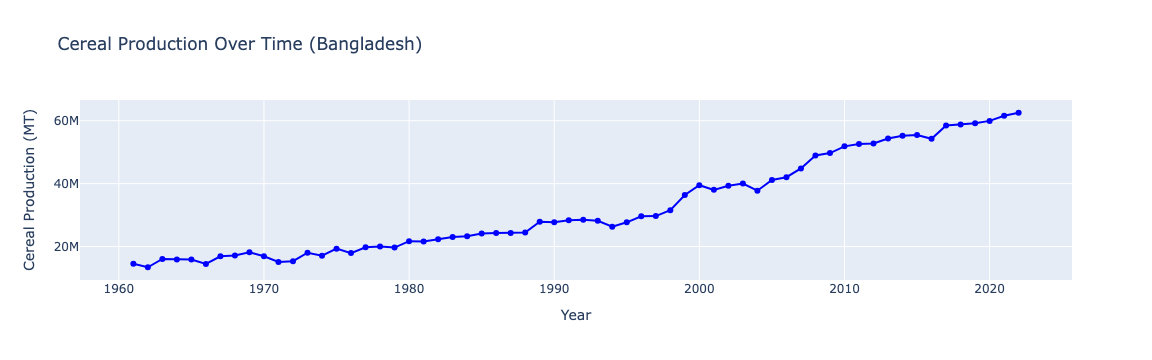

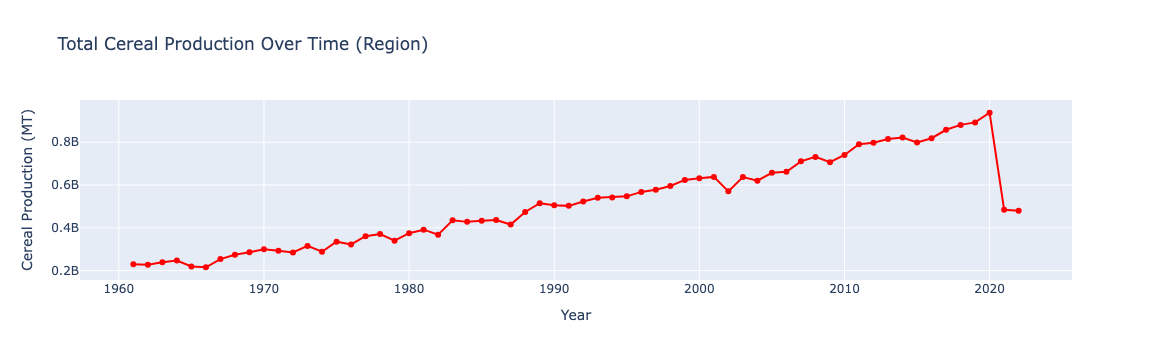

In [39]:
import plotly.graph_objects as go

def overlay_cereal_production(country_name, df):
    """
    Function to overlay cereal production over time for a given country.
    
    Parameters:
    - country_name (str): The name of the country whose data will be plotted.
    - df (pd.DataFrame): The DataFrame containing the cereal production data.
    
    Returns:
    - A Plotly figure with the cereal production data for the country.
    """
    df = df.reset_index()
    # Check if the country exists in the DataFrame
    if country_name not in df['Country'].values:
        print(f"Country '{country_name}' not found in the dataset.")
        return
    
    # Filter data for the given country
    country_df = df[df['Country'] == country_name]
    
    # Create a figure
    fig = go.Figure()
    
    # Add the cereal production plot for the country
    fig.add_trace(go.Scatter(x=country_df['Date'], y=country_df['Cereal Production (MT)'], 
                             mode='lines+markers', name=country_name, 
                             line=dict(dash='solid', color='blue')))
    
    # Add title and labels
    fig.update_layout(title=f"Cereal Production Over Time ({country_name})",
                      xaxis_title="Year",
                      yaxis_title="Cereal Production (MT)")
    
    # Show the plot
    fig.show()

def overlay_cereal_production_region(df):
    """
    Function to overlay total cereal production over time for the whole region.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the cereal production data.
    
    Returns:
    - A Plotly figure with total cereal production for the region.
    """
    df = df.reset_index()
    # Group data by year and sum the production
    region_df = df.groupby('Date')['Cereal Production (MT)'].sum().reset_index()
    
    # Create a figure
    fig = go.Figure()
    
    # Add the total cereal production plot for the region
    fig.add_trace(go.Scatter(x=region_df['Date'], y=region_df['Cereal Production (MT)'], 
                             mode='lines+markers', name="Total Region", 
                             line=dict(dash='solid', color='red')))
    
    # Add title and labels
    fig.update_layout(title="Total Cereal Production Over Time (Region)",
                      xaxis_title="Year",
                      yaxis_title="Cereal Production (MT)")
    
    # Show the plot
    fig.show()

# Example usage:
overlay_cereal_production("Bangladesh", SA_ag)
overlay_cereal_production_region(SA_ag)

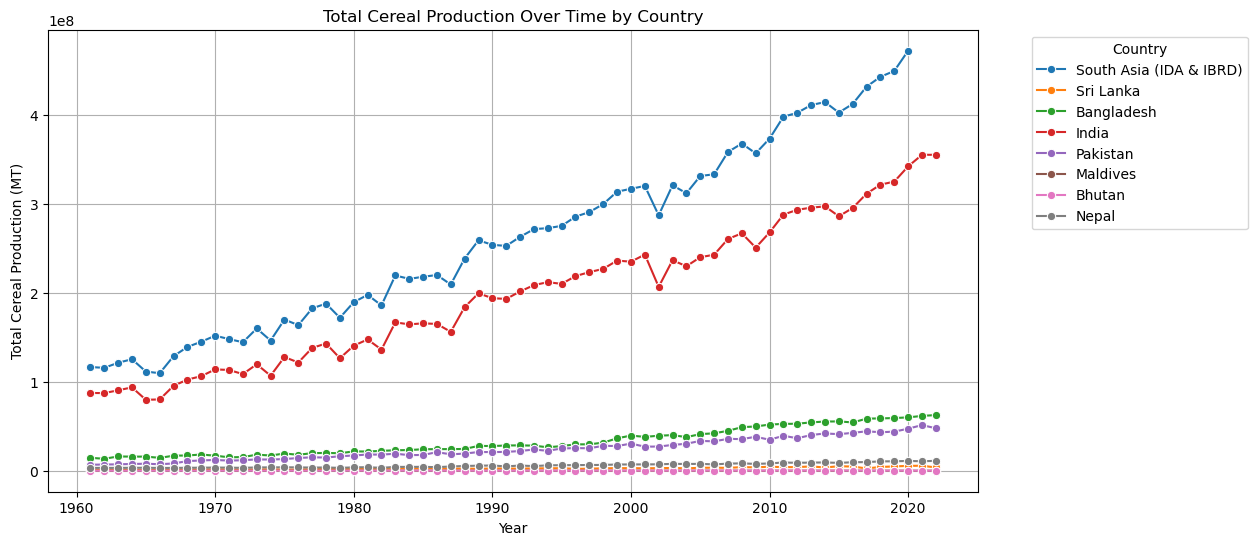

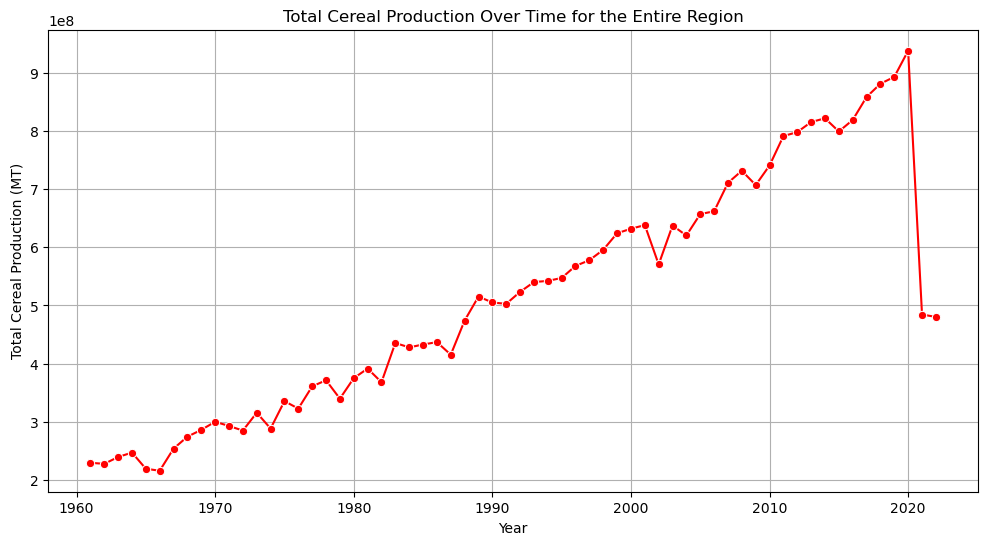

In [40]:
# Produce total cereal production over time plot for each country, specifying each type of cereal
# Produce same plot for the whole region
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.lineplot(data=SA_ag, x="Date", y="Cereal Production (MT)", hue="Country", marker="o")
plt.xlabel("Year")
plt.ylabel("Total Cereal Production (MT)")
plt.title("Total Cereal Production Over Time by Country")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

regional_production = SA_ag.groupby("Date")["Cereal Production (MT)"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=regional_production, x="Date", y="Cereal Production (MT)", marker="o", color='red')
plt.xlabel("Year")
plt.ylabel("Total Cereal Production (MT)")
plt.title("Total Cereal Production Over Time for the Entire Region")
plt.grid(True)
plt.show()

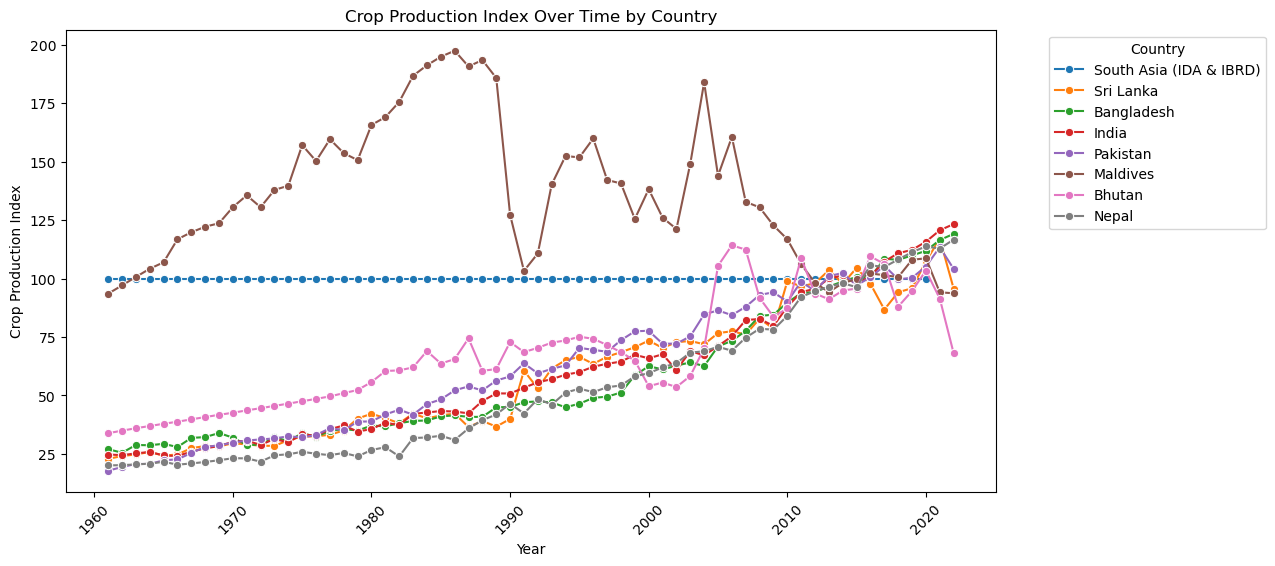

In [41]:
# Produce Crop Production Index over time plot for each country, specifying top 5 crops (or crops of interest
# for the Green revolution)

SA_ag = SA_ag.reset_index() 
SA_ag = SA_ag.rename(columns={'date': 'Date'})  # Ensure correct column name

plt.figure(figsize=(12, 6))

# Line plot for Crop Production Index over time
sns.lineplot(data=SA_ag, x="Date", y="Crop Production Index", hue="Country", marker="o")

plt.xlabel("Year")
plt.ylabel("Crop Production Index")
plt.title("Crop Production Index Over Time by Country")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

# green_rev_crops = ["Wheat", "Rice", "Maize", "Sorghum", "Barley"]

# plt.figure(figsize=(12, 6))

# # Filter dataset for only Green Revolution crops
# for crop in green_rev_crops:
#     if crop in SA_ag.columns:
#         sns.lineplot(data=SA_ag, x="Date", y=crop, label=crop)

# plt.xlabel("Year")
# plt.ylabel("Production Index")
# plt.title("Top Green Revolution Crops Over Time")
# plt.legend(title="Crop", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.xticks(rotation=45)
# plt.show()

In [37]:
# Produce Food Production Index over time plot for each country, specifying top 5 crops (or crops of interest
# for the Green revolution)

# Unable to do so because data not granual to crop type just production index

In [ ]:
# Produce plot of Agricultural Value Added per Worker for each country

# Indicator no longer available in dataset?

# Combined Analysis

**Question:** Given that we cannot load the agricultural data and the population data set at the same time, how can we approach making combined graphs?

### South Asia (Bangladesh, Bhutan, India, Maldives, Nepal, Pakistan, Sri Lanka)

In [46]:
# Overlay total population growth for each country over time with crop production index over time

def overlay_rural_population_growth_and_crop_index(country_name, df):
    """
    Function to overlay rural population growth and crop production index for a given country.
    """
    # Ensure country_name is in the correct case/format
    country_name = country_name.strip().lower()

    # Check if the country exists in the dataset
    if country_name not in [col.lower() for col in df.columns.get_level_values(1)]:
        print(f"Country '{country_name}' not found in the dataset.")
        return
    
    # Extract the rural population and crop production index for the country
    rural_population = df[('Total Rural Population', country_name)]  # Replace with actual column name for rural population
    crop_production_index = df[('Crop Production Index', country_name)]  # Column for crop production index
    
    # Create a figure
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the rural population growth on the left axis
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Rural Population Growth (%)", color="tab:blue")
    ax1.plot(rural_population.index, rural_population, color="tab:blue", label="Rural Population Growth", marker="o")
    ax1.tick_params(axis='y', labelcolor="tab:blue")
    
    # Create a second y-axis to plot the crop production index
    ax2 = ax1.twinx()
    ax2.set_ylabel("Crop Production Index (2014-2016 = 100)", color="tab:red")
    ax2.plot(crop_production_index.index, crop_production_index, color="tab:red", label="Crop Production Index", marker="x")
    ax2.tick_params(axis='y', labelcolor="tab:red")
    
    # Add a title and show the plot
    plt.title(f"Rural Population Growth and Crop Production Index Over Time ({country_name})")
    fig.tight_layout()  # Adjust layout
    plt.show()

# Example usage: Overlay for a country (e.g., "India")
overlay_rural_population_growth_and_crop_index("India", SA_ag)

IndexError: Too many levels: Index has only 1 level, not 2

In [ ]:
# Overlay total crop production index over time with agriculutral value of worker added

In [ ]:
# Add asymptotes for major technological advancements in the timeline (i.e. new fertiliser, etc.)